# Loading the data frame

In [10]:
import pandas as pd

In [28]:
df = pd.read_csv("data/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [29]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9
59470,1,35381,2022-10-28,-9999,9
59471,1,35381,2022-10-29,-9999,9
59472,1,35381,2022-10-30,-9999,9


--- 

# Loading specifc columns

In [10]:
df[10:21]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,1
11,1,35381,1860-01-12,-18,1
12,1,35381,1860-01-13,-27,1
13,1,35381,1860-01-14,-26,1
14,1,35381,1860-01-15,-37,1
15,1,35381,1860-01-16,-9,1
16,1,35381,1860-01-17,7,1
17,1,35381,1860-01-18,-6,1
18,1,35381,1860-01-19,-16,1
19,1,35381,1860-01-20,-19,1


In [13]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [14]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59469   -9999
59470   -9999
59471   -9999
59472   -9999
59473   -9999
Name:    TG, Length: 59474, dtype: int64

In [15]:
df[['    DATE','   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59469,2022-10-27,-9999
59470,2022-10-28,-9999
59471,2022-10-29,-9999
59472,2022-10-30,-9999


--- 

# Statistics and filtering

In [18]:
#loc means locate and essentially acts as a conditional statement
df.loc[df['   TG'] != -9999]['   TG'].mean() /10
#what this code means is locate inside the tg column in data frame values which dont equal -9999 and then return them and calculate their
#mean (we divide by 10 bcuz the data itself is multiplied by 10 to avoid having to include decimal places $ extra commas)
#the -9999 values are there as placeholders for unknown values

np.float64(6.360787526128467)

In [19]:
df.loc[df['   TG'] != -9999]['   TG'].max() /10

np.float64(26.2)

In [20]:
df.loc[df['   TG'] != -9999]['   TG'].min() /10

np.float64(-28.8)

<Axes: >

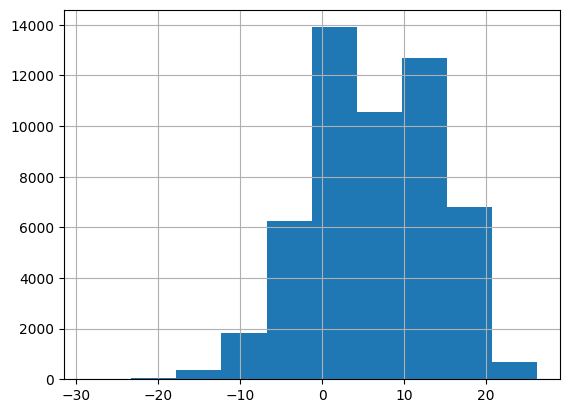

In [25]:
#what i did here was make a variable called accurate data frame and divided all the temp values by 10 and plotted a histogram of it
#where x represents the temp and y is how frequently that temp was measured 
acc_df=df.loc[df['   TG'] != -9999]['   TG'] /10
acc_df.hist()

--- 

# Call certain cells

In [14]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9
59470,1,35381,2022-10-28,-9999,9
59471,1,35381,2022-10-29,-9999,9
59472,1,35381,2022-10-30,-9999,9


In [41]:
df.loc[df['    DATE'] == '1860-01-05']['   TG'].squeeze() / 10
# locate in date column in data frame where date is 1860-01-05 and gimme the temperature from that day 

np.float64(3.1)

### calling a cell with its index number

In [13]:
df.loc[3, '   TG']

np.int64(37)

--- 

# Cleaning the DataFrame

In [40]:
#basically created a new column named TG0 where we  masked the TG rows with -9999 values and replaced them with NaN which means no value
import numpy as np
df['TG0'] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,1,21.0
1,1,35381,1860-01-02,46,1,46.0
2,1,35381,1860-01-03,31,1,31.0
3,1,35381,1860-01-04,37,1,37.0
4,1,35381,1860-01-05,31,1,31.0
...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN
59470,1,35381,2022-10-28,-9999,9,NaN
59471,1,35381,2022-10-29,-9999,9,NaN
59472,1,35381,2022-10-30,-9999,9,NaN


In [43]:
#new fahrenheit column with the formula lol
df['fahrenheit'] = df['TG'] * (9/5) + 32

In [44]:
#made the TG column which is accurate temps
df["TG"] = df["TG0"] / 10
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG,fahrenheit
0,1,35381,1860-01-01,21,1,21.0,2.1,35.78
1,1,35381,1860-01-02,46,1,46.0,4.6,40.28
2,1,35381,1860-01-03,31,1,31.0,3.1,37.58
3,1,35381,1860-01-04,37,1,37.0,3.7,38.66
4,1,35381,1860-01-05,31,1,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN,NaN,NaN
59470,1,35381,2022-10-28,-9999,9,NaN,NaN,NaN
59471,1,35381,2022-10-29,-9999,9,NaN,NaN,NaN
59472,1,35381,2022-10-30,-9999,9,NaN,NaN,NaN


---

# Graphs and Plotting

<Axes: >

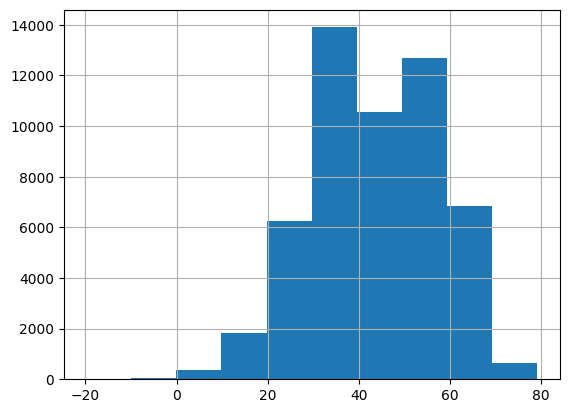

In [48]:
df['fahrenheit'].hist()

<Axes: >

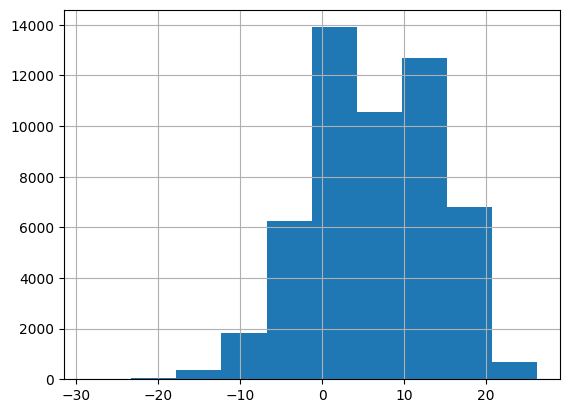

In [49]:
df['TG'].hist()

<Axes: xlabel='    DATE'>

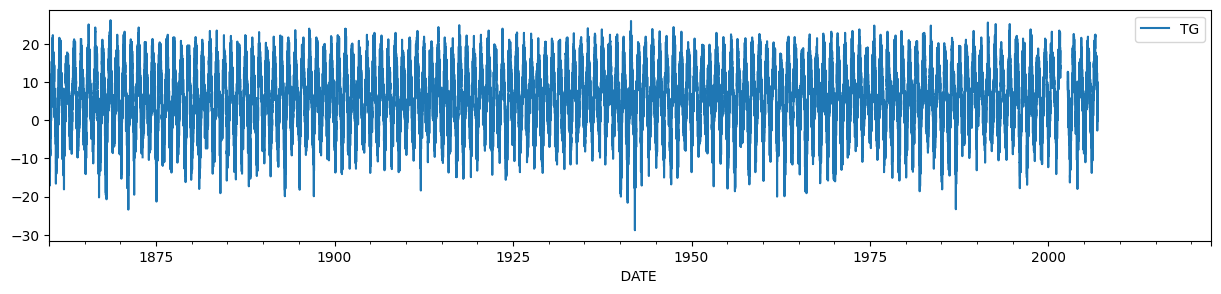

In [53]:
df.plot(x='    DATE',y='TG', figsize=(15,3))

<Axes: xlabel='    DATE'>

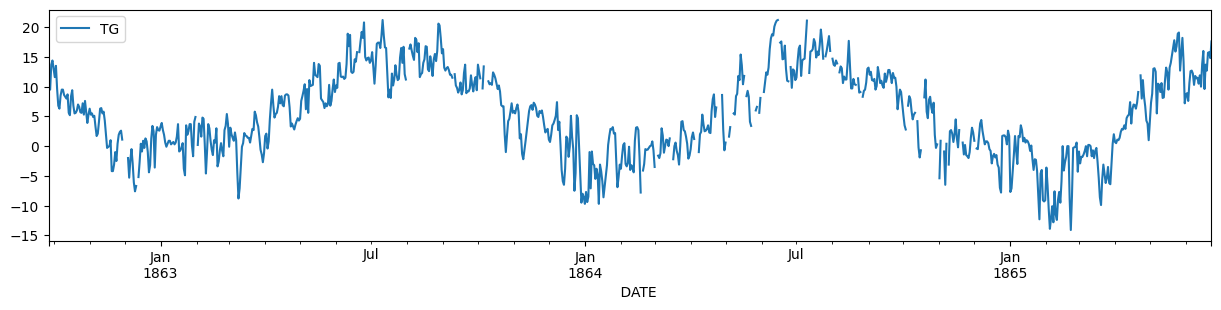

In [54]:
df[1000:2001].plot(x='    DATE',y='TG', figsize=(15,3))